In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import seaborn as sns
import math

In [2]:
df = pd.read_csv(r"E:\Hilary\ESG\Group Project\US_emissions.csv")

In [3]:
# Filter for years 2019–2023
df_filtered = df[df["year"].between(2019, 2023)]

# Group by commodity and year, summing emissions
agg = df_filtered.groupby(["commodity", "year"], as_index=False)[
    ["total_operational_emissions_MtCO2e", "product_emissions_MtCO2"]
].sum()

# Compute the Scope 1 to Scope 3 ratio
agg["Scope1_to_Scope3_Ratio"] = (
    agg["total_operational_emissions_MtCO2e"] / agg["product_emissions_MtCO2"]
)

# Preview
print(agg.head())


         commodity  year  total_operational_emissions_MtCO2e  \
0  Bituminous Coal  2019                           17.679715   
1  Bituminous Coal  2020                           10.906472   
2  Bituminous Coal  2021                           13.285495   
3  Bituminous Coal  2022                           14.142670   
4  Bituminous Coal  2023                           14.352860   

   product_emissions_MtCO2  Scope1_to_Scope3_Ratio  
0               156.500151                0.112969  
1                96.543665                0.112969  
2               117.602684                0.112969  
3               125.190364                0.112969  
4               127.050959                0.112969  


C:\Users\Arushi\AppData\Local\Temp\ipykernel_17024\891803144.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Scope1_to_Scope3_Ratio"] = df_filtered["total_operational_emissions_MtCO2e"] / df_filtered["product_emissions_MtCO2"]


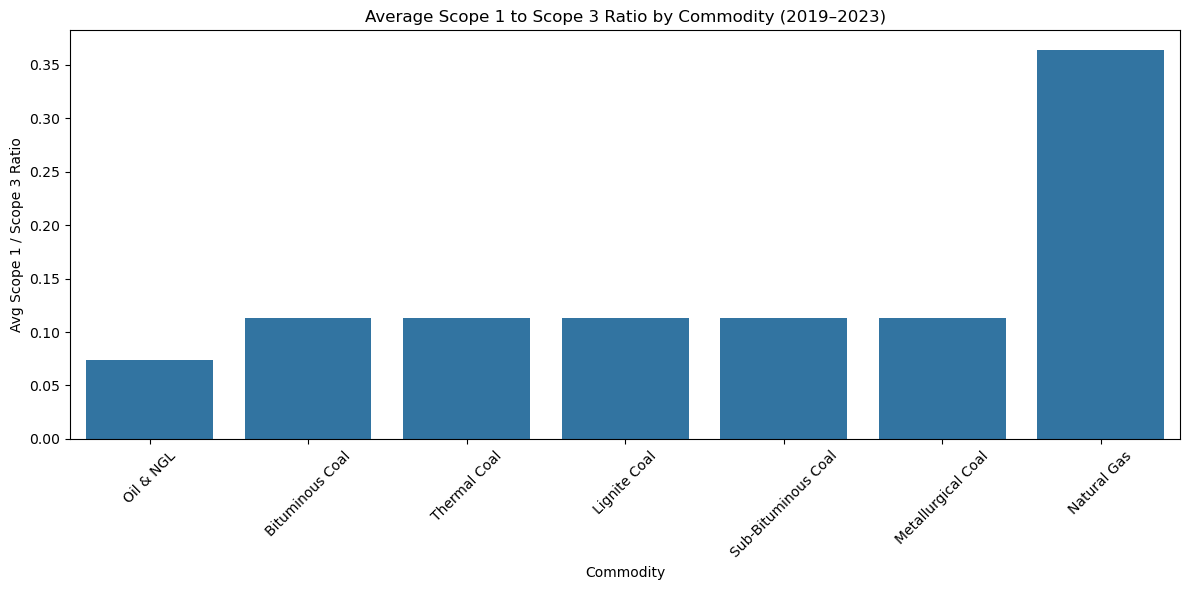

In [4]:
# Filter for years 2019–2023
df_filtered = df[df["year"].between(2019, 2023)]

# Compute company-level Scope 1 to Scope 3 emission ratio
df_filtered["Scope1_to_Scope3_Ratio"] = df_filtered["total_operational_emissions_MtCO2e"] / df_filtered["product_emissions_MtCO2"]

# Group by commodity and year, and compute the average ratio
grouped = df_filtered.groupby(["commodity", "year"])["Scope1_to_Scope3_Ratio"].mean().reset_index()

# Bar chart summarizing average ratio across all years
avg_ratio_by_commodity = df_filtered.groupby("commodity")["Scope1_to_Scope3_Ratio"].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_ratio_by_commodity.index, y=avg_ratio_by_commodity.values)
plt.xticks(rotation=45)
plt.title("Average Scope 1 to Scope 3 Ratio by Commodity (2019–2023)")
plt.ylabel("Avg Scope 1 / Scope 3 Ratio")
plt.xlabel("Commodity")
plt.tight_layout()
plt.show()

In [5]:
# # Step 1: Drop unnecessary columns (e.g., columns with "Unnamed")
# df_clean = df.drop(columns=[col for col in df.columns if "Unnamed" in col])

# # Step 2: Filter for years after (and including) 2019 and only for Natural Gas commodity
# df_clean = df_clean[(df_clean["year"] >= 2019) & (df_clean["commodity"] == "Natural Gas")]

# # Step 3: Keep only the relevant columns
# df_intensity = df_clean[[
#     "year", 
#     "parent_entity", 
#     "total_operational_emissions_MtCO2e",  # Scope 1: Direct emissions
#     "product_emissions_MtCO2"             # Scope 3: Indirect emissions
# ]]

# # Step 4: Sort by company and year
# df_sorted = df_intensity.sort_values(by=["parent_entity", "year"]).reset_index(drop=True)

# # Step 5: Compute the year-over-year deltas
# df_sorted["Scope1_delta"] = df_sorted.groupby("parent_entity")["total_operational_emissions_MtCO2e"].diff()
# df_sorted["Scope3_delta"] = df_sorted.groupby("parent_entity")["product_emissions_MtCO2"].diff()

# # Step 6: Compute dynamic year-specific threshold (25th percentile of Scope 3 deltas)
# # yearly_thresholds = df_sorted.groupby("year")["Scope3_delta"].quantile(0.50)

# # Step 7: Define helper to retrieve threshold for a given year
# def get_threshold_for_year(year, thresholds):
#     if year in thresholds.index:
#         return thresholds.loc[year]
#     else:
#         return -0.05  # fallback default

# # Step 8: Classification logic
# def classify_greenwashing(row):
#     if pd.isna(row["Scope1_delta"]) or pd.isna(row["Scope3_delta"]):
#         return "Other"
    
#     threshold = -10
#     # get_threshold_for_year(row["year"], yearly_thresholds)

#     if row["Scope1_delta"] < 0 and row["Scope3_delta"] < 0:
#         return "True Reducer"
#     elif row["Scope1_delta"] >= 0 and row["Scope3_delta"] < threshold:
#         return "Potential Greenwasher"
#     else:
#         return "Other"

# # Step 9: Apply classification
# df_sorted["Greenwashing_Risk"] = df_sorted.apply(classify_greenwashing, axis=1)

# # Step 10: Save output
# # df_sorted.to_csv("natural_gas_true_reducer_vs_greenwasher.csv", index=False)
# df_sorted

In [6]:
# # Step 7: Plot pie charts by year
# target_years = [2018,2019, 2020, 2021, 2022, 2023]
# df_years = df_sorted[df_sorted["year"].isin(target_years)]
# years = sorted(df_years["year"].unique())

# fig, axes = plt.subplots(2, 3, figsize=(30, 16))
# axes = axes.flatten()
# colors = sns.color_palette('pastel', 4)

# for i, yr in enumerate(years):
#     df_current = df_years[df_years["year"] == yr]
#     counts = df_current["Greenwashing_Risk"].value_counts()
    
#     axes[i].pie(
#         counts,
#         labels=counts.index,
#         autopct='%1.1f%%',
#         startangle=90,
#         colors=colors,
#         wedgeprops={'edgecolor': 'black'},
#         textprops={'fontsize': 18}
#     )
#     axes[i].set_title(f"{yr}", fontsize=20)

# # Remove any empty subplot
# if len(years) < len(axes):
#     for j in range(len(years), len(axes)):
#         fig.delaxes(axes[j])

# plt.suptitle("Company-Level Greenwashing Classification (All Commodities Aggregated, 2019–2023)", fontsize=22)
# plt.tight_layout()
# plt.show()

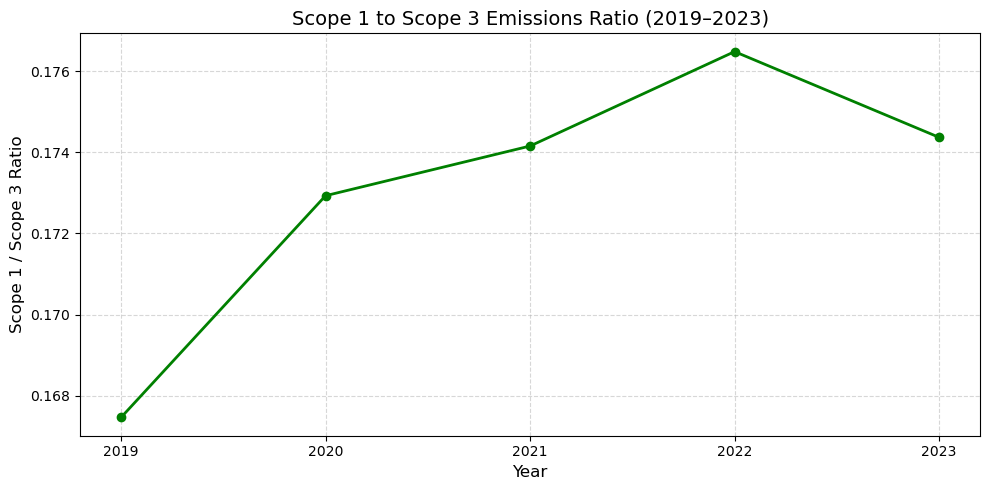

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure correct data type
df['year'] = df['year'].astype(int)

# Filter for years
df_filtered = df[df['year'] >= 2019]

# Group by year across all companies and sum emissions
yearly_emissions = df_filtered.groupby('year')[
    ['total_operational_emissions_MtCO2e', 'product_emissions_MtCO2']
].sum().reset_index()

# Rename for clarity
yearly_emissions.rename(columns={
    'total_operational_emissions_MtCO2e': 'Scope_1',
    'product_emissions_MtCO2': 'Scope_3'
}, inplace=True)

# Avoid division by zero
yearly_emissions['Scope_3'] = yearly_emissions['Scope_3'].replace(0, pd.NA)

# Calculate Scope 1 to Scope 3 ratio
yearly_emissions['Scope1_to_Scope3_Ratio'] = yearly_emissions['Scope_1'] / yearly_emissions['Scope_3']

# Ensure year is integer for plotting
yearly_emissions['year'] = yearly_emissions['year'].astype(int)

# Plot Scope 1 to Scope 3 ratio
plt.figure(figsize=(10, 5))
plt.plot(
    yearly_emissions['year'],
    yearly_emissions['Scope1_to_Scope3_Ratio'],
    color='green',
    marker='o',
    linewidth=2
)
plt.xticks(yearly_emissions['year'])  # Explicitly set x-ticks to the integer year values
plt.title('Scope 1 to Scope 3 Emissions Ratio (2019–2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Scope 1 / Scope 3 Ratio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Drop unnecessary columns and filter years
df_clean = df.drop(columns=[col for col in df.columns if "Unnamed" in col])
df_clean = df_clean[df_clean["year"] >= 2018]

# Step 2: Keep only relevant columns
df_subset = df_clean[[
    "year",
    "parent_entity",
    "commodity",
    "total_operational_emissions_MtCO2e",  # Scope 1
    "product_emissions_MtCO2"              # Scope 3
]]

# Step 3: Aggregate by company and year (sum across commodities)
df_grouped = df_subset.groupby(["parent_entity", "year"], as_index=False).agg({
    "total_operational_emissions_MtCO2e": "sum",
    "product_emissions_MtCO2": "sum"
})

# Step 4: Compute year-over-year deltas
df_sorted = df_grouped.sort_values(by=["parent_entity", "year"]).reset_index(drop=True)
df_sorted["Scope1_delta"] = df_sorted.groupby("parent_entity")["total_operational_emissions_MtCO2e"].diff()
df_sorted["Scope3_delta"] = df_sorted.groupby("parent_entity")["product_emissions_MtCO2"].diff()

# Step 5: Compute year-wise median Scope3_delta thresholds
yearly_medians = df_sorted.groupby("year")["Scope3_delta"].median()

# Step 6: Classification function
def get_threshold(year):
    return yearly_medians.get(year, -0.05)

def classify(row):
    if pd.isna(row["Scope1_delta"]) or pd.isna(row["Scope3_delta"]):
        return "Insufficient Data"

    threshold = get_threshold(row["year"])
    s1 = row["Scope1_delta"]
    s3 = row["Scope3_delta"]

    # Priority order: most concerning first
    if s1 > 0 and s3 > 0:
        return "Needs Scrutiny"
    elif s1 > 0 and s3 < threshold:
        return "Potential Greenwasher"
    elif s1 < 0 and s3 > 0:
        return "Shifted Burden"
    elif s1 < 0 and s3 < 0:
        return "True Reducer"
    else:
        return "Insufficient Data"

df_sorted["Greenwashing_Risk"] = df_sorted.apply(classify, axis=1)

# Export to CSV
# df_sorted.to_csv("greenwashing_classification_results.csv", index=False)
# print("Data exported to greenwashing_classification_results.csv")

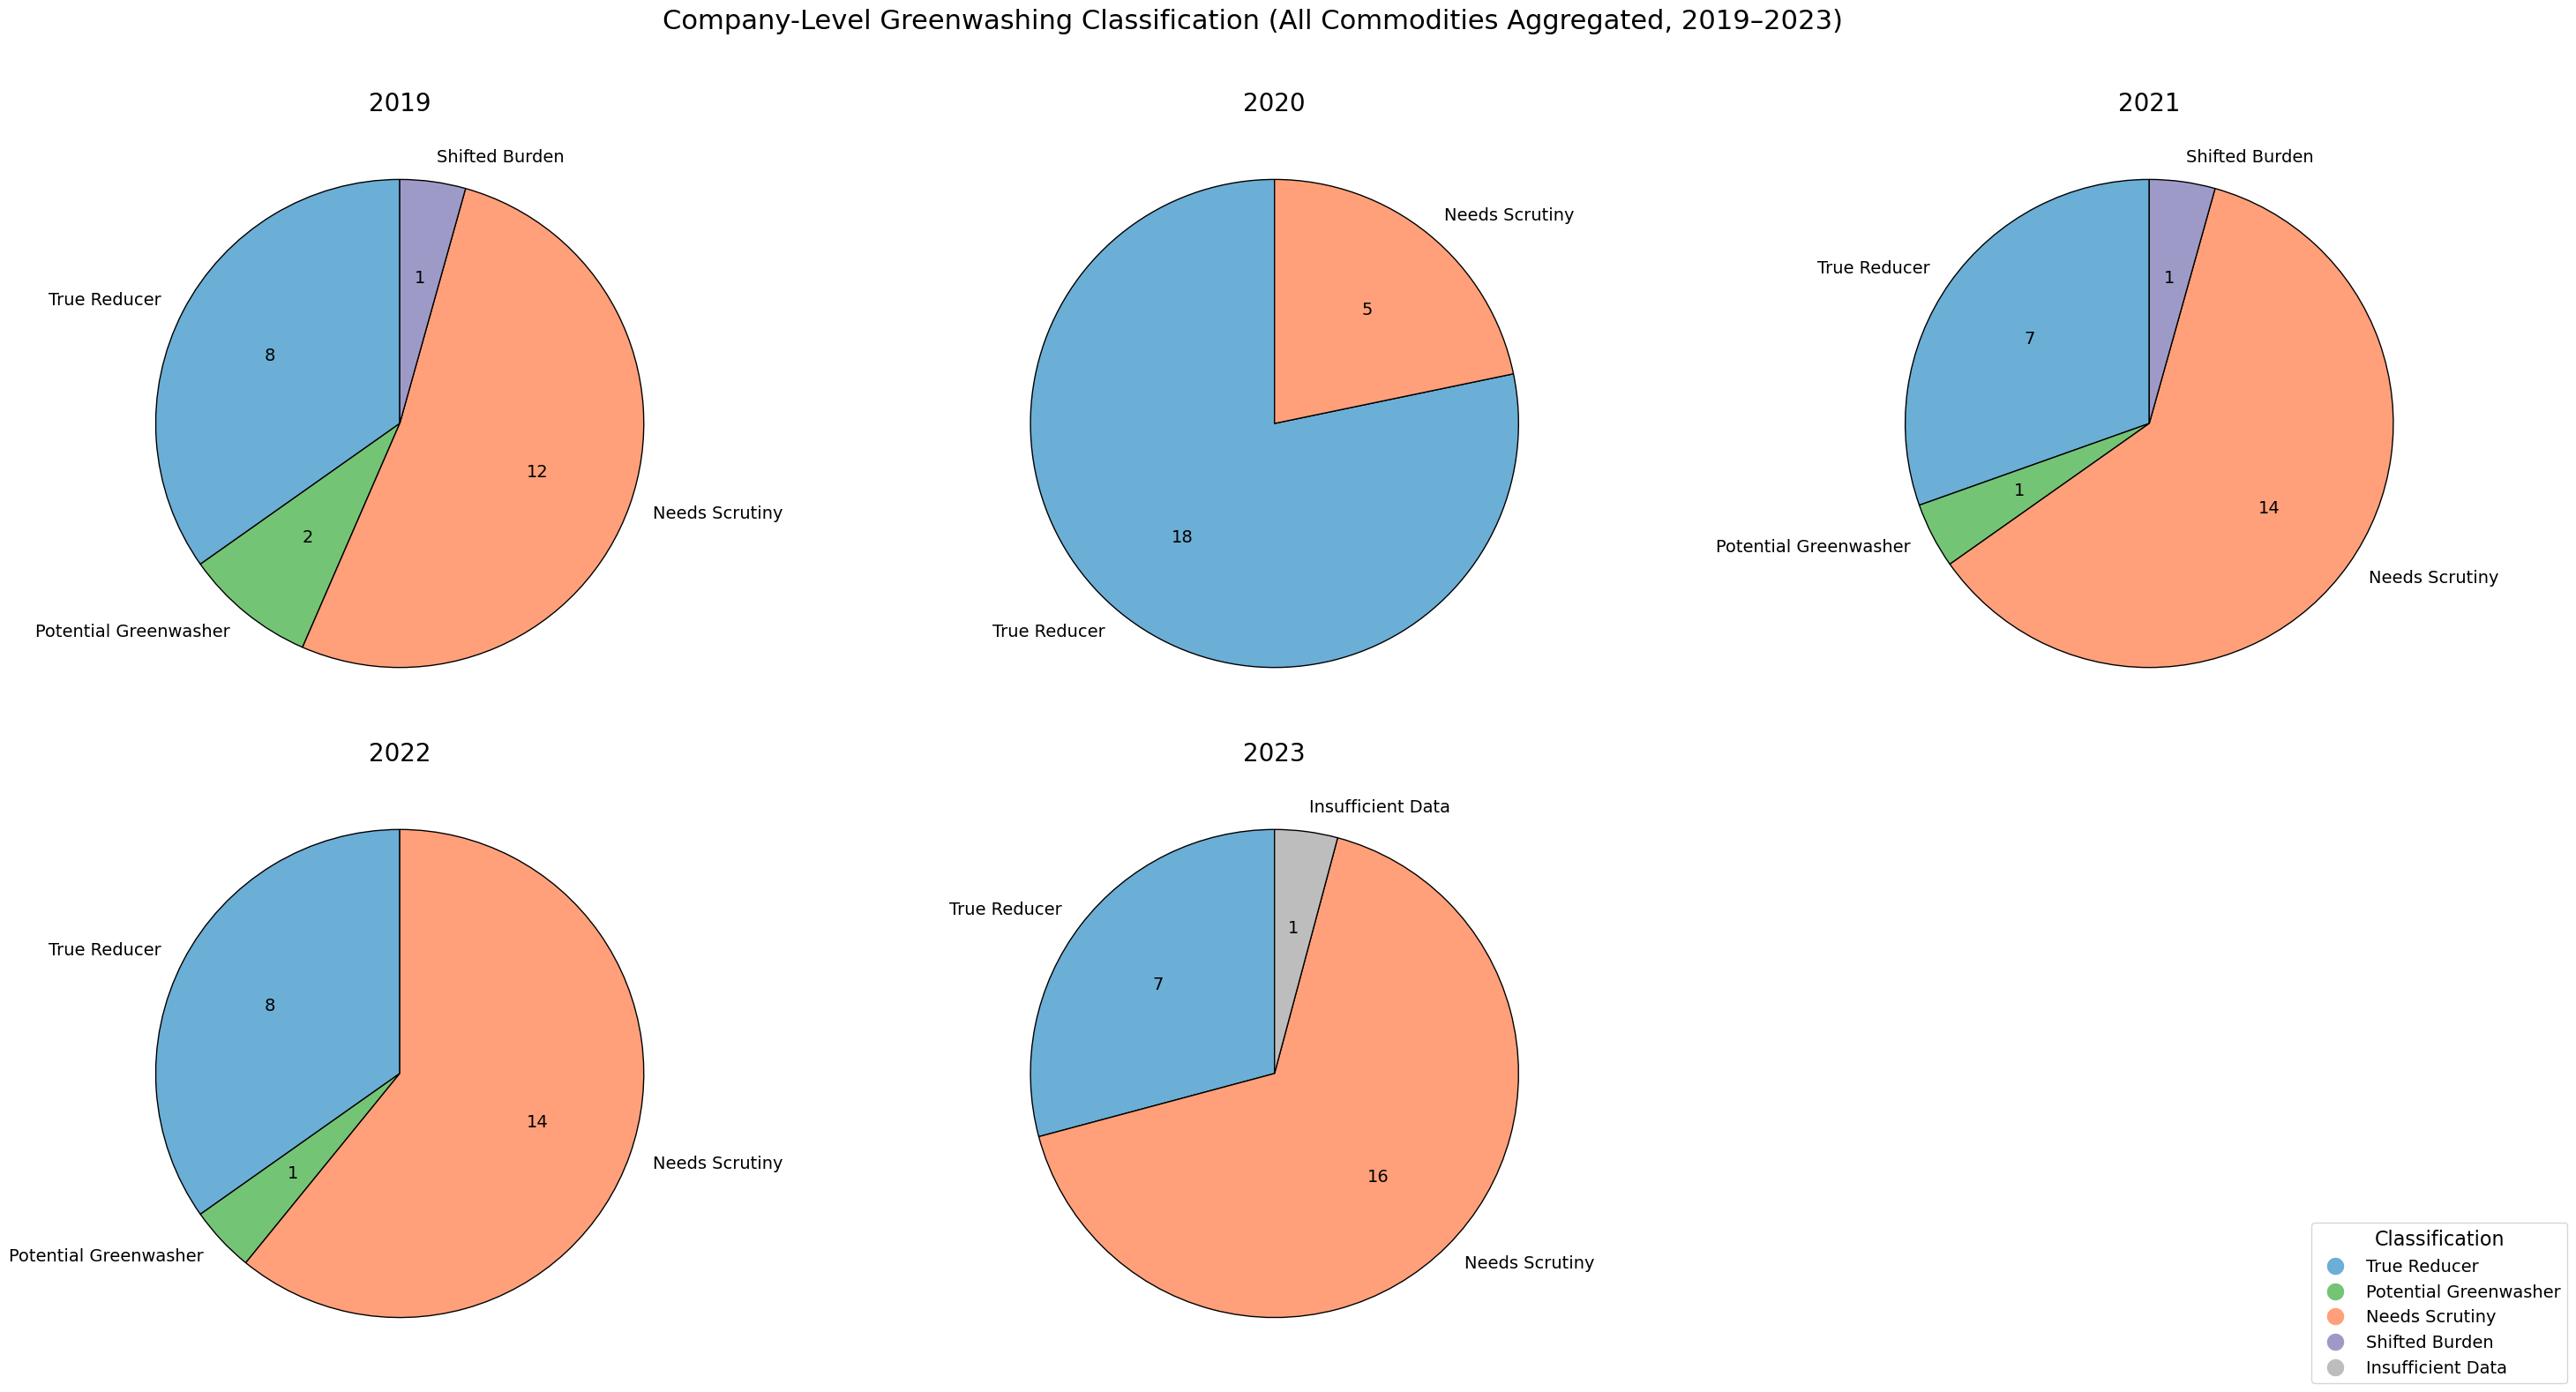

In [24]:
target_years = [2019, 2020, 2021, 2022, 2023]
df_years = df_sorted[df_sorted["year"].isin(target_years)]
years = sorted(df_years["year"].unique())

fig, axes = plt.subplots(2, 3, figsize=(30, 16))
axes = axes.flatten()

risk_categories = ["True Reducer", "Potential Greenwasher", "Needs Scrutiny", "Shifted Burden", "Insufficient Data"]
color_mapping = {
    "True Reducer": "#6BAED6",             
    "Potential Greenwasher": "#74C476",    
    "Needs Scrutiny": "lightsalmon",         
    "Shifted Burden": "#9E9AC8",          
    "Insufficient Data": "#BDBDBD"         
}

for i, yr in enumerate(years):
    df_current = df_years[df_years["year"] == yr]
    counts = df_current["Greenwashing_Risk"].value_counts()

    # Filter categories with non-zero counts
    filtered_categories = [cat for cat in risk_categories if counts.get(cat, 0) > 0]
    values = [counts[cat] for cat in filtered_categories]
    pie_colors = [color_mapping[cat] for cat in filtered_categories]

    # Labels are now just the category names (no company names)
    labels = filtered_categories

    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct * total / 100.0))
            return f'{val}' if val > 0 else ''
        return my_autopct

    axes[i].pie(
        values,
        labels=labels,
        autopct=make_autopct(values),
        startangle=90,
        colors=pie_colors,
        wedgeprops={'edgecolor': 'black'},
        textprops={'fontsize': 14}
    )
    axes[i].set_title(f"{yr}", fontsize=20)

if len(years) < len(axes):
    for j in range(len(years), len(axes)):
        fig.delaxes(axes[j])

legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', label=label,
               markerfacecolor=color_mapping[label], markersize=15)
    for label in risk_categories
]

fig.legend(
    handles=legend_handles,
    title='Classification',
    loc='lower right',
    fontsize=14,
    title_fontsize=16
)

plt.subplots_adjust(bottom=0.15, right=0.9)
plt.suptitle("Company-Level Greenwashing Classification (All Commodities Aggregated, 2019–2023)\n\n", fontsize=22)
plt.tight_layout()
plt.show()


In [16]:
years = sorted(df_sorted["year"].unique())

# Loop over each year, examine the distribution of Scope3_delta
for yr in years:
    df_year = df_sorted[df_sorted["year"] == 2019]
    print(f"Year: {yr}")
    print(df_year["Scope3_delta"].describe())  # This prints count, mean, std, min, 25th, 50th, 75th, max

Year: 2018
count    23.000000
mean     -1.215206
std      16.804278
min     -48.969049
25%      -0.902579
50%       1.030669
75%       5.029501
max      22.230362
Name: Scope3_delta, dtype: float64
Year: 2019
count    23.000000
mean     -1.215206
std      16.804278
min     -48.969049
25%      -0.902579
50%       1.030669
75%       5.029501
max      22.230362
Name: Scope3_delta, dtype: float64
Year: 2020
count    23.000000
mean     -1.215206
std      16.804278
min     -48.969049
25%      -0.902579
50%       1.030669
75%       5.029501
max      22.230362
Name: Scope3_delta, dtype: float64
Year: 2021
count    23.000000
mean     -1.215206
std      16.804278
min     -48.969049
25%      -0.902579
50%       1.030669
75%       5.029501
max      22.230362
Name: Scope3_delta, dtype: float64
Year: 2022
count    23.000000
mean     -1.215206
std      16.804278
min     -48.969049
25%      -0.902579
50%       1.030669
75%       5.029501
max      22.230362
Name: Scope3_delta, dtype: float64
Year: 2023

C:\Users\Arushi\AppData\Local\Temp\ipykernel_17024\3860239802.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_scope3, x="year", y="Scope3_delta", palette="pastel")


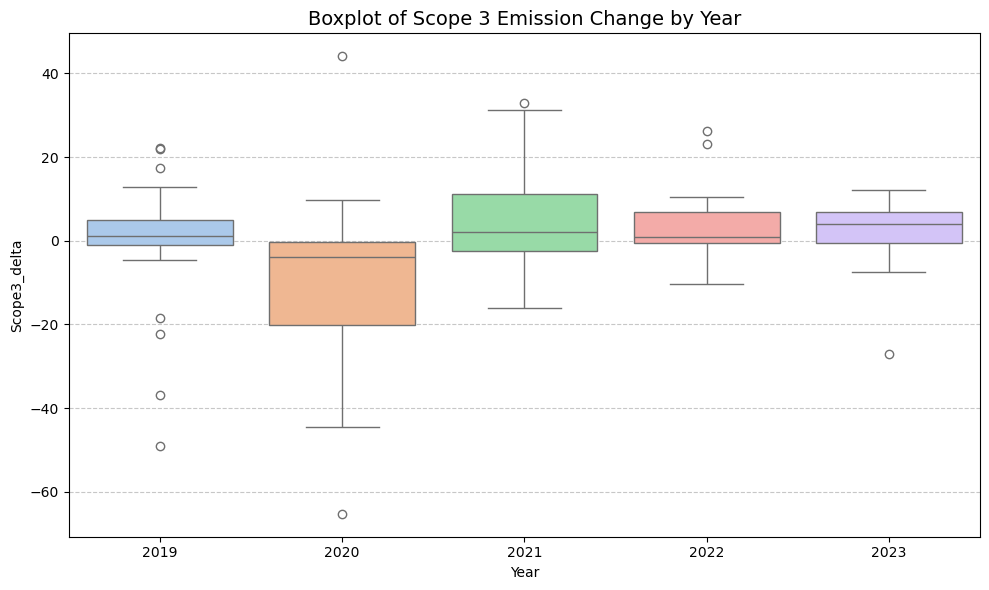

In [17]:
df_scope3 = df_sorted[df_sorted["year"].isin(range(2019, 2024))]  # 2019–2023

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_scope3, x="year", y="Scope3_delta", palette="pastel")

plt.title("Boxplot of Scope 3 Emission Change by Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Scope3_delta")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# # Group by year and classification
# grouped = df_sorted[df_sorted["year"].isin(target_years)].groupby(
#     ["year", "Greenwashing_Risk"]
# )["parent_entity"].nunique().unstack().fillna(0)

# # Define consistent colors
# color_mapping = {
#     'True Reducer': 'skyblue',
#     'Potential Greenwasher': 'lightgreen',
#     'Other': 'lightsalmon'
# }

# # Plot with legend outside the chart
# ax = grouped.plot(
#     kind='bar',
#     stacked=True,
#     figsize=(12, 6),
#     color=[color_mapping.get(col, 'gray') for col in grouped.columns]
# )

# # Styling
# plt.title("Stacked Bar Chart of Greenwashing Classification by Year", fontsize=18)
# plt.xlabel("Year", fontsize=14)
# plt.ylabel("Number of Companies", fontsize=14)
# plt.xticks(rotation=0)

# # Move legend outside
# plt.legend(
#     title="Classification",
#     title_fontsize=13,
#     fontsize=12,
#     bbox_to_anchor=(1.02, 1),
#     loc='upper left',
#     borderaxespad=0
# )

# plt.tight_layout()
# plt.show()


In [ ]:
# Time series of classification counts
classification_counts = df_sorted.groupby(["year", "Greenwashing_Risk"]).size().unstack().fillna(0)
classification_counts.plot(kind='line', figsize=(10, 6))
plt.title("Classification Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Companies")
plt.legend(title="Classification")
plt.grid(True)
plt.show()


In [ ]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# import seaborn as sns


# # STEP 1: Basic filtering
# df = df[df["year"] >= 2018]
# df = df[[
#     "year", "parent_entity",
#     "total_operational_emissions_MtCO2e",  # Scope 1
#     "product_emissions_MtCO2"              # Scope 3
# ]]

# # STEP 2: Aggregate by company and year
# df_grouped = df.groupby(["parent_entity", "year"], as_index=False).agg({
#     "total_operational_emissions_MtCO2e": "sum",
#     "product_emissions_MtCO2": "sum"
# })

# # STEP 3: Compute year-over-year deltas
# df_grouped = df_grouped.sort_values(by=["parent_entity", "year"])
# df_grouped["Scope1_delta"] = df_grouped.groupby("parent_entity")["total_operational_emissions_MtCO2e"].diff()
# df_grouped["Scope3_delta"] = df_grouped.groupby("parent_entity")["product_emissions_MtCO2"].diff()

# # STEP 4: Pivot into wide format
# features_df = df_grouped.pivot_table(
#     index="parent_entity",
#     columns="year",
#     values=["Scope1_delta", "Scope3_delta"]
# ).fillna(0)
# features_df.columns = [f"{var}_{yr}" for var, yr in features_df.columns]

# # STEP 5: Standardize the features
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features_df)

# # STEP 6: Apply KMeans (start with k=3, can optimize later)
# kmeans = KMeans(n_clusters=3, random_state=42)
# clusters = kmeans.fit_predict(scaled_features)
# features_df["Cluster"] = clusters

# # STEP 7: Visualize clusters with PCA
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(scaled_features)
# features_df["PCA1"] = pca_result[:, 0]
# features_df["PCA2"] = pca_result[:, 1]

# # STEP 8: Plot
# plt.figure(figsize=(10, 6))
# sns.scatterplot(
#     data=features_df,
#     x="PCA1", y="PCA2",
#     hue="Cluster", palette="Set2", s=100
# )
# plt.title("K-Means Clustering of Companies Based on Emissions Deltas")
# plt.xlabel("PCA Component 1")
# plt.ylabel("PCA Component 2")
# plt.legend(title="Cluster")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# # OPTIONAL: Inspect cluster centers or export
# features_df.reset_index(inplace=True)
# features_df.to_csv("company_clusters.csv", index=False)


In [ ]:
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# # Use the same scaled_features from earlier (Scope1 & Scope3 deltas)
# wcss = []
# k_values = range(1, 11)

# for k in k_values:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(scaled_features)
#     wcss.append(kmeans.inertia_)  # inertia_ = WCSS

# # Plot the elbow curve
# plt.figure(figsize=(8, 5))
# plt.plot(k_values, wcss, marker='o', linestyle='--')
# plt.title("Elbow Method for Optimal k")
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
# plt.xticks(k_values)
# plt.grid(True, linestyle='--', alpha=0.5)
# plt.tight_layout()
# plt.show()


In [ ]:
# # Merge cluster labels back with original deltas
# df_clustered = features_df.copy()

# # Drop PCA columns to focus on original deltas
# delta_columns = [col for col in df_clustered.columns if col.startswith("Scope")]
# cluster_profiles = df_clustered.groupby("Cluster")[delta_columns].mean()
# print(cluster_profiles)


C:\Users\Arushi\AppData\Local\Temp\ipykernel_17024\1897586067.py:11: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  scope3_change = scope3_pivot.pct_change(axis=1) * 100


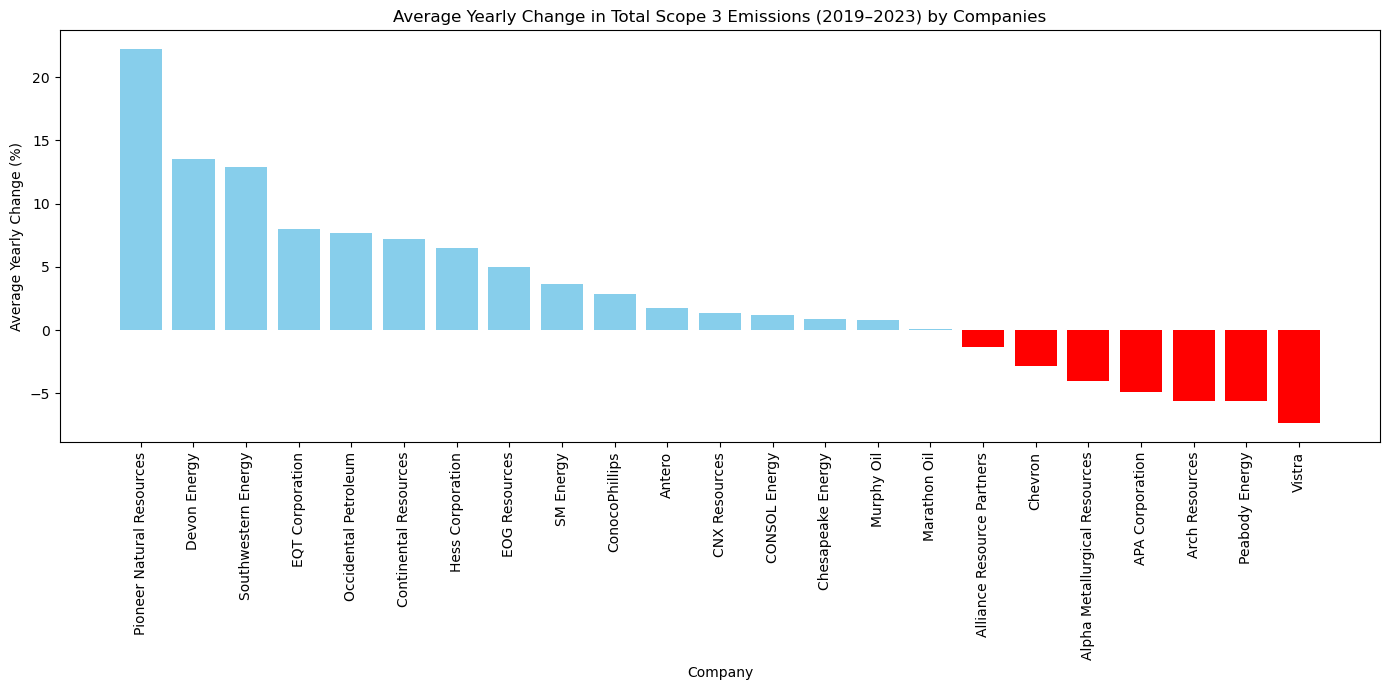

In [25]:
# Filter for years 2019–2023
df_filtered = df[df["year"].between(2019, 2023)]

# Group by year and parent_entity, summing Scope 3 emissions
scope3_yearly = df_filtered.groupby(["parent_entity", "year"])["product_emissions_MtCO2"].sum().reset_index()

# Pivot to get years as columns
scope3_pivot = scope3_yearly.pivot(index="parent_entity", columns="year", values="product_emissions_MtCO2")

# Calculate year-over-year percentage changes
scope3_change = scope3_pivot.pct_change(axis=1) * 100

# Compute average percentage change per company
scope3_avg_change = scope3_change.mean(axis=1).dropna().sort_values(ascending=False)

# Prepare for plotting
scope3_avg_change_df = scope3_avg_change.reset_index()
scope3_avg_change_df.columns = ["Company", "Average YoY Change (%)"]
colors = ['red' if val < 0 else 'skyblue' for val in scope3_avg_change_df["Average YoY Change (%)"]]

# Plot
plt.figure(figsize=(14, 7))
plt.bar(scope3_avg_change_df["Company"], scope3_avg_change_df["Average YoY Change (%)"], color=colors)
plt.xticks(rotation=90)
plt.title("Average Yearly Change in Total Scope 3 Emissions (2019–2023) by Companies")
plt.ylabel("Average Yearly Change (%)")
plt.xlabel("Company")
plt.tight_layout()
plt.show()

C:\Users\Arushi\AppData\Local\Temp\ipykernel_17024\4219186872.py:11: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  scope3_change = scope3_pivot.pct_change(axis=1) * 100


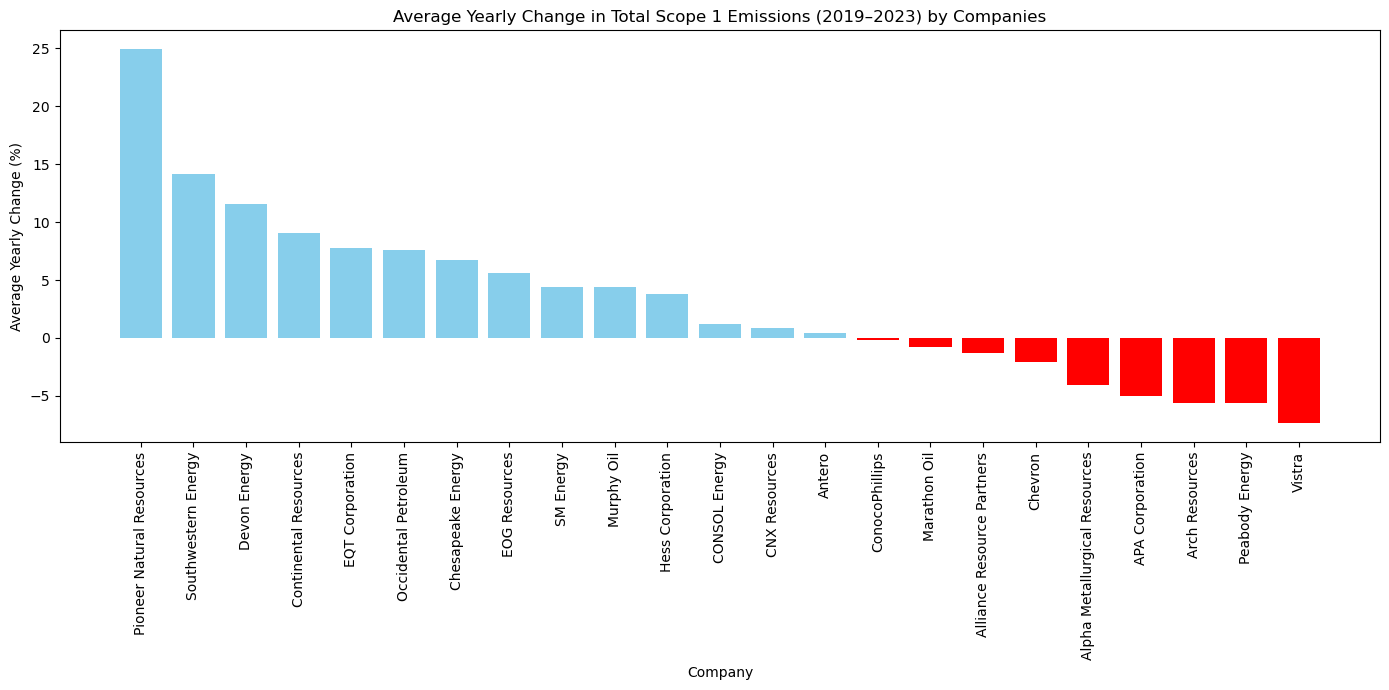

In [26]:
# Filter for years 2019–2023
df_filtered = df[df["year"].between(2019, 2023)]

# Group by year and parent_entity, summing Scope 3 emissions
scope3_yearly = df_filtered.groupby(["parent_entity", "year"])["total_operational_emissions_MtCO2e"].sum().reset_index()

# Pivot to get years as columns
scope3_pivot = scope3_yearly.pivot(index="parent_entity", columns="year", values="total_operational_emissions_MtCO2e")

# Calculate year-over-year percentage changes
scope3_change = scope3_pivot.pct_change(axis=1) * 100

# Compute average percentage change per company
scope3_avg_change = scope3_change.mean(axis=1).dropna().sort_values(ascending=False)

# Prepare for plotting
scope3_avg_change_df = scope3_avg_change.reset_index()
scope3_avg_change_df.columns = ["Company", "Average YoY Change (%)"]
colors = ['red' if val < 0 else 'skyblue' for val in scope3_avg_change_df["Average YoY Change (%)"]]

# Plot
plt.figure(figsize=(14, 7))
plt.bar(scope3_avg_change_df["Company"], scope3_avg_change_df["Average YoY Change (%)"], color=colors)
plt.xticks(rotation=90)
plt.title("Average Yearly Change in Total Scope 1 Emissions (2019–2023) by Companies")
plt.ylabel("Average Yearly Change (%)")
plt.xlabel("Company")
plt.tight_layout()
plt.show()

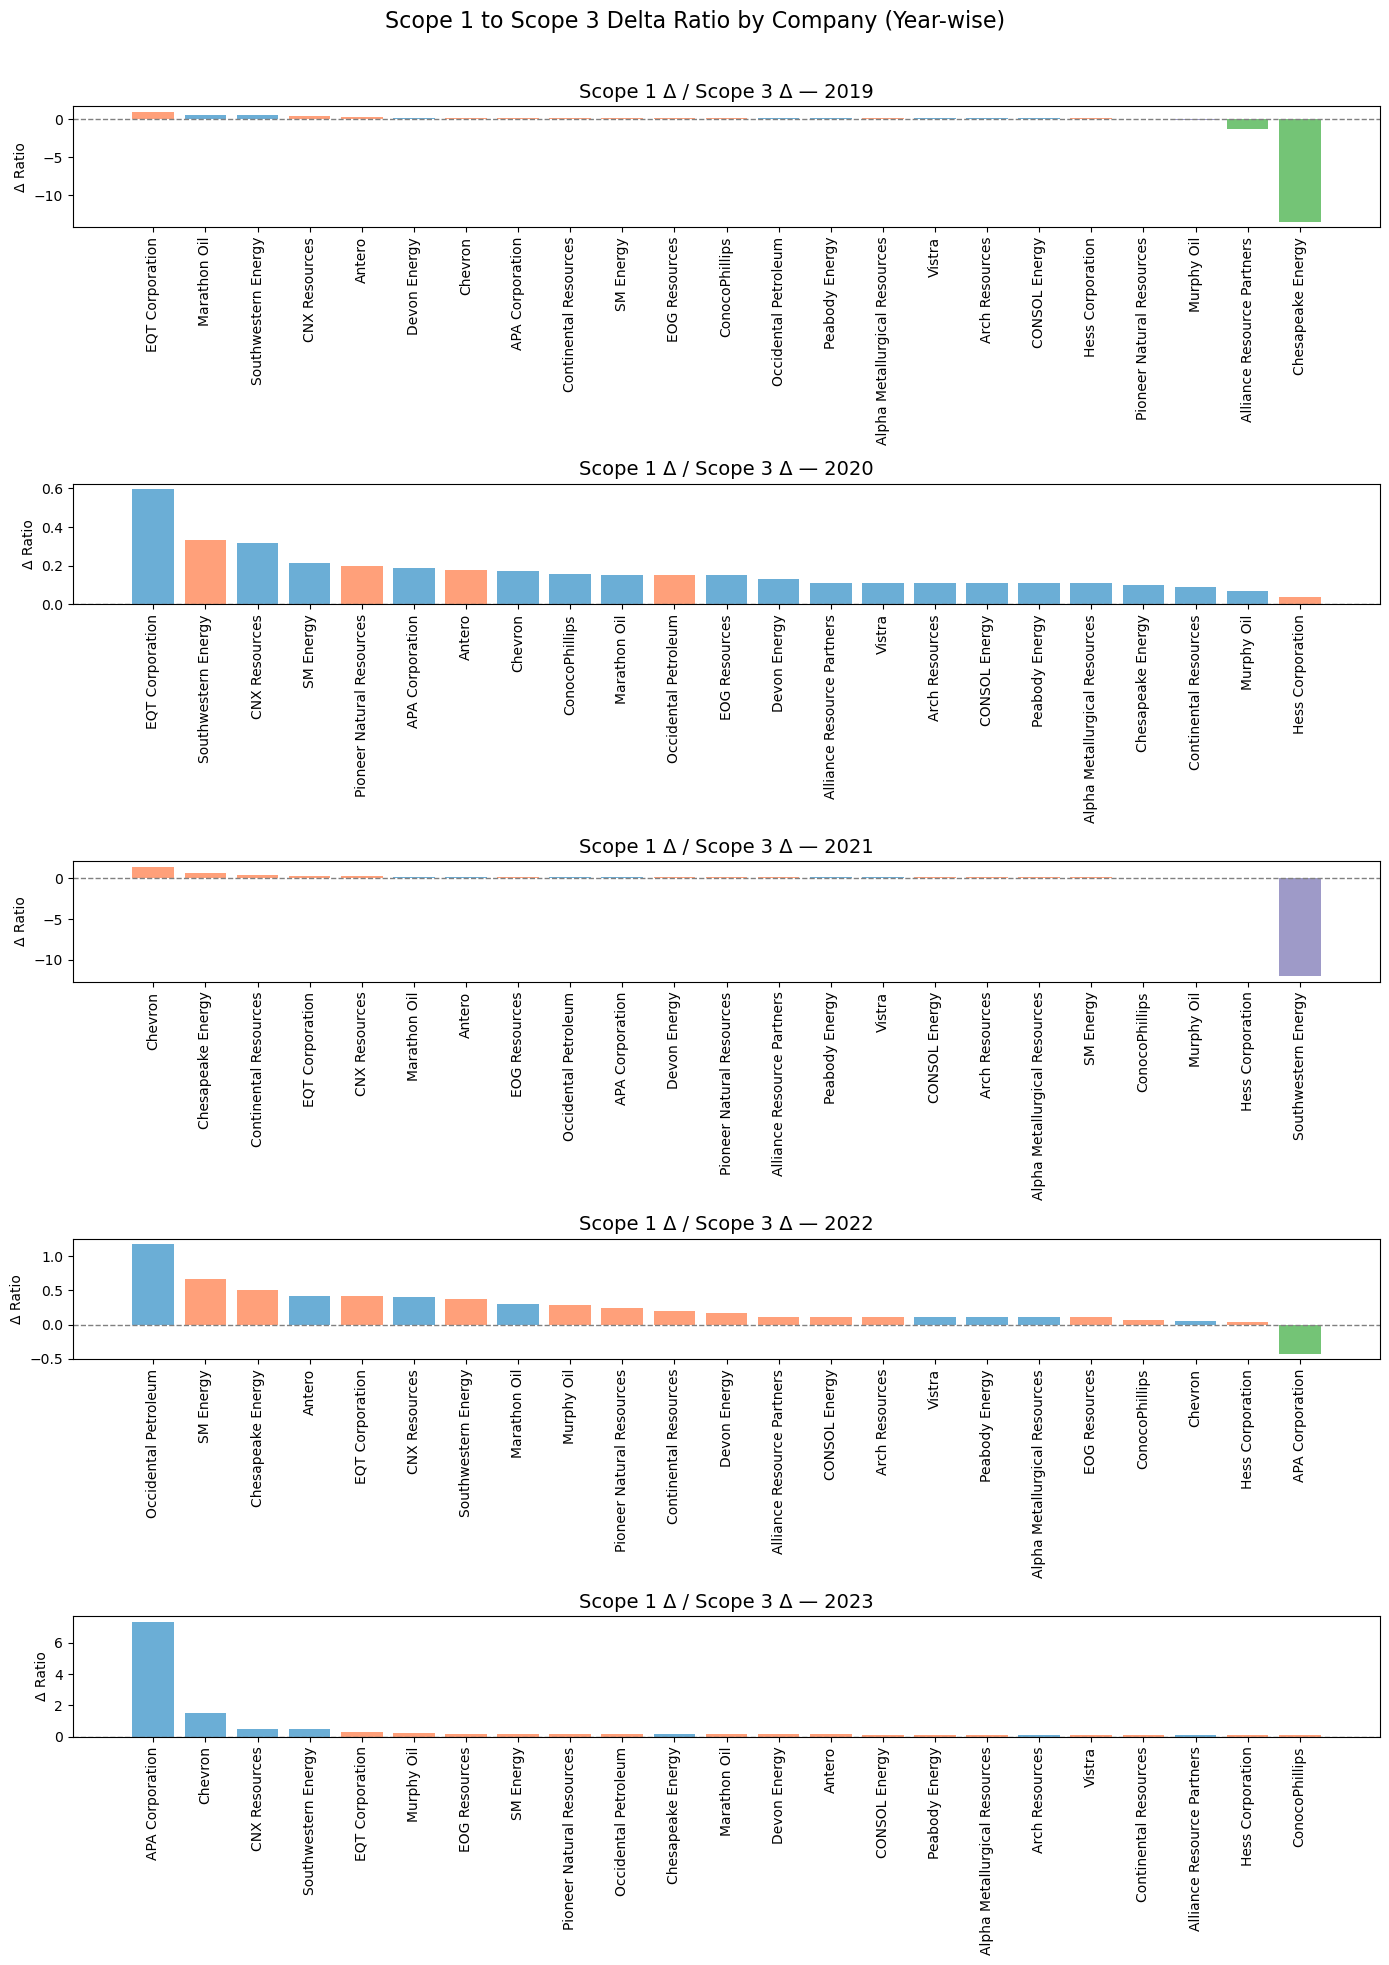

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Filter data from 2019–2023
df_delta = df_sorted[df_sorted["year"].between(2019, 2023)].copy()

# Step 2: Compute delta ratio
df_delta["Delta_Ratio"] = df_delta["Scope1_delta"] / df_delta["Scope3_delta"]
df_delta = df_delta.replace([float('inf'), -float('inf')], pd.NA).dropna(subset=["Delta_Ratio"])

# Step 3: Set color mapping
color_mapping = {
    "True Reducer": "#6BAED6",
    "Potential Greenwasher": "#74C476",
    "Needs Scrutiny": "lightsalmon",
    "Shifted Burden": "#9E9AC8",
    "Insufficient Data": "#BDBDBD"
}

# Step 4: Plot year-wise subplots
years = sorted(df_delta["year"].unique())
n_years = len(years)
fig, axes = plt.subplots(n_years, 1, figsize=(14, 4 * n_years), sharex=False)

if n_years == 1:
    axes = [axes]  # make iterable if only one year

for i, year in enumerate(years):
    data_year = df_delta[df_delta["year"] == year].sort_values(by="Delta_Ratio", ascending=False)
    colors = data_year["Greenwashing_Risk"].map(color_mapping).fillna("gray")

    axes[i].bar(data_year["parent_entity"], data_year["Delta_Ratio"], color=colors)
    axes[i].set_title(f"Scope 1 Δ / Scope 3 Δ — {year}", fontsize=14)
    axes[i].axhline(0, color='gray', linestyle='--', linewidth=1)
    axes[i].set_ylabel("Δ Ratio")
    axes[i].tick_params(axis='x', rotation=90)

fig.suptitle("Scope 1 to Scope 3 Delta Ratio by Company (Year-wise)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


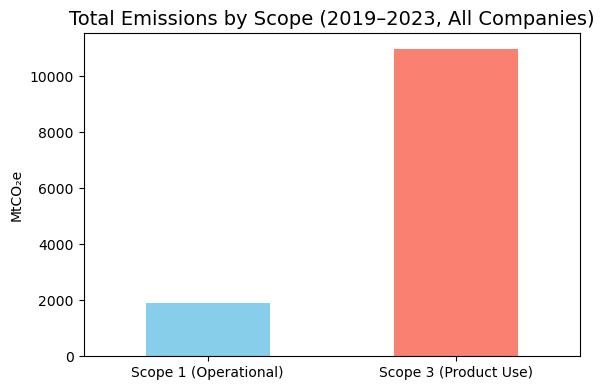

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for 2019–2023
df_context = df[df["year"].between(2019, 2023)].copy()

# Sum Scope 1 and Scope 3 emissions across all companies
scope_totals = df_context[["total_operational_emissions_MtCO2e", "product_emissions_MtCO2"]].sum()

# Rename for display
scope_totals.index = ["Scope 1 (Operational)", "Scope 3 (Product Use)"]

# Plot
plt.figure(figsize=(6, 4))
scope_totals.plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Total Emissions by Scope (2019–2023, All Companies)", fontsize=14)
plt.ylabel("MtCO₂e")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
